In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Train dataset, dataframe
train = pd.read_csv('C:/Users/etona/Documents/Scripts ML Kaggle/House Prices Advanced Techniques/house-prices-advanced-regression-techniques/train.csv')

#Test dataset, dataframe
test = pd.read_csv('C:/Users/etona/Documents/Scripts ML Kaggle/House Prices Advanced Techniques/house-prices-advanced-regression-techniques/test.csv')

In [4]:
#Function for missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].round(1)
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


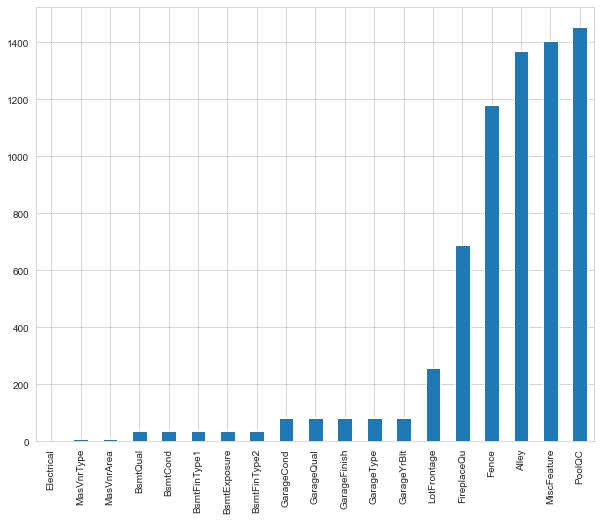

In [7]:
sns.set_style("whitegrid")
plt.figure(num=None, figsize=(10, 8))
missing = train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

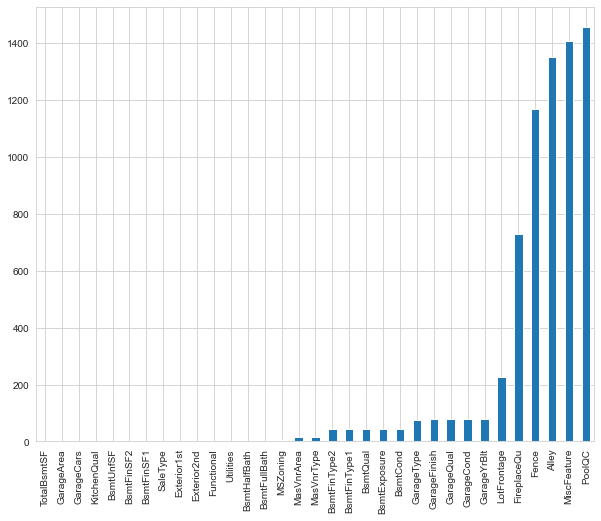

In [8]:
sns.set_style("whitegrid")
plt.figure(num=None, figsize=(10, 8))
missing = test.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [9]:
# Setting apart quantitative and qualitative features
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [10]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [16]:
#List with columns in train dataset to fill missing numbers
train_fillna_NA = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

#Loop for to fill
for i in train_fillna_NA:
    train[i] = train[i].fillna('NA')

#Filling one missing value in Electrical
train['Electrical'] = train['Electrical'].fillna('Mix')

In [17]:
#List with columns in test dataset to fill missing numbers
test_fillna_NA = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in test_fillna_NA:
    test[i] = test[i].fillna("NA")
    
test['Exterior1st'] = test['Exterior1st'].fillna('Other')
test['Exterior2nd'] = test['Exterior2nd'].fillna('Other')
test['Functional'] = test['Functional'].fillna('Typ')
test['SaleType'] = test['SaleType'].fillna('Oth')

In [18]:
#Missing numbers in train dataframe
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [19]:
train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [20]:
train['LotFrontage'] = train['LotFrontage'].fillna(0)

In [21]:
train['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [22]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [23]:
train['GarageYrBlt'].min()

1900.0

In [24]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1900)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [26]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning          4
LotFrontage     227
Utilities         2
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [29]:
#Filling nan with min values 
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].min())

#Filling nan in qualitative for most frequency values in each feature (test dataframe)
test_missing_cols_qualitative = [f for f in test.columns if test.dtypes[f] == 'object' and test[f].isnull().sum() > 0]
for i in test_missing_cols_qualitative:
    list = test[i].value_counts()
    test[i] = test[i].fillna(list.index[0])

test_missing_cols_quantitative = [f for f in test.columns if test.dtypes[f] != 'object' and test[f].isnull().sum() > 0]
for i in test_missing_cols_quantitative:
    test[i] = test[i].fillna(0)

In [30]:
#Changing qualitative values for numbers
for i in qualitative:
    a = train.groupby(i).mean('SalePrice')['SalePrice']
    a = a.sort_values(ascending = False)
    b = a.to_dict()
    for k, key in enumerate(b):
        b[key] = k + 1
    train[i] = train[i].replace(b)
    test[i] = test[i].replace(b)

#Replacing other values    
test['Exterior1st'] = test['Exterior1st'].replace('Other', 4)

### Verifying if there is still missing values

In [31]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [32]:
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [33]:
missing_values_table(train)

,Missing Values,% of Total Values


In [34]:
missing_values_table(test)

,Missing Values,% of Total Values


In [35]:
#To delete all the outliers from train dataframe

for i in quantitative+['SalePrice']:
    q_low = train[i].quantile(0.01)
    q_hi = train[i].quantile(0.99)
    train = train[(train[i] <= q_hi) & (train[i] >= q_low)]

In [36]:
#To delete all the outliers from test dataframe

for i in quantitative:
    q_low = test[i].quantile(0.01)
    q_hi = test[i].quantile(0.99)
    test[i] = test[i].where(test[i] <= q_hi, q_hi)
    test[i] = test[i].where(test[i] >= q_low, q_low)

In [37]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.00,11622.0,1,1,4,3,1,...,120,0,4,3,2,0,6,2010,5,2
1,1462,20,2,81.00,14267.0,1,1,3,3,1,...,0,0,4,1,3,1326,6,2010,5,2
2,1463,60,2,74.00,13830.0,1,1,3,3,1,...,0,0,4,3,2,0,3,2010,5,2
3,1464,60,2,78.00,9978.0,1,1,3,3,1,...,0,0,4,1,2,0,6,2010,5,2
4,1465,120,2,43.00,5005.0,1,1,3,1,1,...,144,0,4,1,2,0,1,2010,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.00,1936.0,1,1,4,3,1,...,0,0,4,1,2,0,6,2006,5,2
1455,2916,160,4,21.00,1894.0,1,1,4,3,1,...,0,0,4,1,2,0,4,2006,5,5
1456,2917,20,2,129.42,20000.0,1,1,4,3,1,...,0,0,4,1,2,0,9,2006,5,5
1457,2918,85,2,62.00,10441.0,1,1,4,3,1,...,0,0,4,3,4,700,7,2006,5,2


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [39]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,1,4,3,1,...,0,4,1,2,0,2,2008,5,2,208500
1,2,20,2,80.0,9600,1,1,4,3,1,...,0,4,1,2,0,5,2007,5,2,181500
2,3,60,2,68.0,11250,1,1,3,3,1,...,0,4,1,2,0,9,2008,5,2,223500
4,5,60,2,84.0,14260,1,1,3,3,1,...,0,4,1,2,0,12,2008,5,2,250000
6,7,20,2,75.0,10084,1,1,4,3,1,...,0,4,1,2,0,8,2007,5,2,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,2,78.0,9262,1,1,4,3,1,...,0,4,1,2,0,5,2009,1,1,287090
1452,1453,180,4,35.0,3675,1,1,4,3,1,...,0,4,1,2,0,5,2006,5,2,145000
1453,1454,20,2,90.0,17217,1,1,4,3,1,...,0,4,1,2,0,7,2006,5,5,84500
1454,1455,20,1,62.0,7500,1,2,4,3,1,...,0,4,1,2,0,10,2009,5,2,185000


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1455
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1078 non-null   int64  
 1   MSSubClass     1078 non-null   int64  
 2   MSZoning       1078 non-null   int64  
 3   LotFrontage    1078 non-null   float64
 4   LotArea        1078 non-null   int64  
 5   Street         1078 non-null   int64  
 6   Alley          1078 non-null   int64  
 7   LotShape       1078 non-null   int64  
 8   LandContour    1078 non-null   int64  
 9   Utilities      1078 non-null   int64  
 10  LotConfig      1078 non-null   int64  
 11  LandSlope      1078 non-null   int64  
 12  Neighborhood   1078 non-null   int64  
 13  Condition1     1078 non-null   int64  
 14  Condition2     1078 non-null   int64  
 15  BldgType       1078 non-null   int64  
 16  HouseStyle     1078 non-null   int64  
 17  OverallQual    1078 non-null   int64  
 18  OverallC

### Transforming into log, for Linear Regression

In [41]:
linear_train = train.copy()
linear_test = test.copy()

tmp = np.array(linear_train['SalePrice'])
tmp = np.log1p(tmp)

In [42]:
for i in quantitative+['SalePrice']:
    tmp = np.array(linear_train[i])
    tmp = np.log1p(tmp)
    linear_train[i] = tmp

In [43]:
for i in quantitative:
    tmp = np.array(linear_test[i])
    tmp = np.log1p(tmp)
    linear_test[i] = tmp

In [44]:
linear_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,2,4.189655,9.042040,1,1,4,3,1,...,0.0,4,1,2,0.0,1.098612,7.605392,5,2,12.247699
1,2,3.044522,2,4.394449,9.169623,1,1,4,3,1,...,0.0,4,1,2,0.0,1.791759,7.604894,5,2,12.109016
2,3,4.110874,2,4.234107,9.328212,1,1,3,3,1,...,0.0,4,1,2,0.0,2.302585,7.605392,5,2,12.317171
4,5,4.110874,2,4.442651,9.565284,1,1,3,3,1,...,0.0,4,1,2,0.0,2.564949,7.605392,5,2,12.429220
6,7,3.044522,2,4.330733,9.218804,1,1,4,3,1,...,0.0,4,1,2,0.0,2.197225,7.604894,5,2,12.634606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,3.044522,2,4.369448,9.133783,1,1,4,3,1,...,0.0,4,1,2,0.0,1.791759,7.605890,1,1,12.567555
1452,1453,5.198497,4,3.583519,8.209580,1,1,4,3,1,...,0.0,4,1,2,0.0,1.791759,7.604396,5,2,11.884496
1453,1454,3.044522,2,4.510860,9.753711,1,1,4,3,1,...,0.0,4,1,2,0.0,2.079442,7.604396,5,5,11.344519
1454,1455,3.044522,1,4.143135,8.922792,1,2,4,3,1,...,0.0,4,1,2,0.0,2.397895,7.605890,5,2,12.128117


In [45]:
linear_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.044522,3,4.394449,9.360741,1,1,4,3,1,...,4.795791,0.0,4,3,2,0.000000,1.945910,7.606387,5,2
1,1462,3.044522,2,4.406719,9.565775,1,1,3,3,1,...,0.000000,0.0,4,1,3,7.190676,1.945910,7.606387,5,2
2,1463,4.110874,2,4.317488,9.534668,1,1,3,3,1,...,0.000000,0.0,4,3,2,0.000000,1.386294,7.606387,5,2
3,1464,4.110874,2,4.369448,9.208238,1,1,3,3,1,...,0.000000,0.0,4,1,2,0.000000,1.945910,7.606387,5,2
4,1465,4.795791,2,3.784190,8.518392,1,1,3,1,1,...,4.976734,0.0,4,1,2,0.000000,0.693147,7.606387,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,4,3.091042,7.568896,1,1,4,3,1,...,0.000000,0.0,4,1,2,0.000000,1.945910,7.604396,5,2
1455,2916,5.081404,4,3.091042,7.546974,1,1,4,3,1,...,0.000000,0.0,4,1,2,0.000000,1.609438,7.604396,5,5
1456,2917,3.044522,2,4.870760,9.903538,1,1,4,3,1,...,0.000000,0.0,4,1,2,0.000000,2.302585,7.604396,5,5
1457,2918,4.454347,2,4.143135,9.253591,1,1,4,3,1,...,0.000000,0.0,4,3,4,6.552508,2.079442,7.604396,5,2


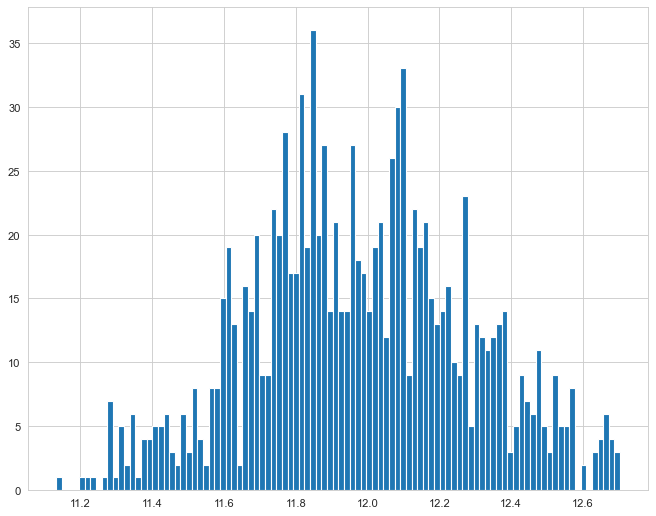

In [46]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(linear_train['SalePrice'], bins=100)
plt.show()

In [47]:
del test['Id']
del linear_test['Id']

## Models

### Linear Regression

In [48]:
y_lr = np.array(linear_train['SalePrice'].copy())
del linear_train['Id'], linear_train['SalePrice']
X_lr = np.array(linear_train)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_lr, y_lr)

LinearRegression()

In [50]:
lr.score(X_lr, y_lr)

0.9110677983332518

In [51]:
# y_pred (Predictions from the test dataset)
y_pred_lr = lr.predict(linear_test)
y_pred_lr = np.expm1(y_pred_lr)
y_pred_lr

array([114357.22529243, 139907.87325016, 183711.31554261, ...,
       171361.31188403, 123012.63354382, 222607.47861019])

### True data test labels

In [52]:
# y_true (From Sample submission)

first = pd.read_csv('C:/Users/etona/Documents/Scripts ML Kaggle/House Prices Advanced Techniques/house-prices-advanced-regression-techniques/sample_submission.csv')
y_true = first['SalePrice']

### Linear Regression metrics

In [53]:
#Import da biblioteca para cálculo das métricas
from sklearn import metrics

#Criando a função para cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando medidas de erro
#essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
R2_lr = metrics.r2_score(y_true, y_pred_lr)
MSE_lr = metrics.mean_squared_error(y_true, y_pred_lr)
RMSE_lr = np.sqrt(metrics.mean_squared_error(y_true, y_pred_lr))
RMSLE_lr = np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_lr))
MAE_lr = metrics.mean_absolute_error(y_true, y_pred_lr)
MAPE_lr = mean_absolute_percentage_error(y_true, y_pred_lr)


print('R2: ', metrics.r2_score(y_true, y_pred_lr))
print('MSE: ', metrics.mean_squared_error(y_true, y_pred_lr))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred_lr)))
print('RMSLE: ', np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_lr)))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred_lr))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred_lr))

R2:  -12.65971456282401
MSE:  3724557776.2604103
RMSE:  61029.15513310348
RMSLE:  0.3524321245133784
MAE:  49785.446282225086
MAPE:  27.838265081461515


### SVR Regression

### SVR (Sem dados escalados)

In [54]:
from sklearn.svm import SVR

svr_data = train.copy()
del svr_data['Id'], svr_data['SalePrice']

X_sv = np.array(svr_data)

y_sv = np.array(train['SalePrice'].copy())

In [55]:
sv = SVR(kernel = 'linear', epsilon=1.0)
sv.fit(X_sv, y_sv)

SVR(epsilon=1.0, kernel='linear')

In [56]:
sv.score(X_sv,y_sv)

0.829229520618412

In [57]:
y_pred_sv = sv.predict(test)
y_pred_sv

array([135881.947267  , 164592.3158465 , 202190.57967856, ...,
       189171.02165168, 124861.06303137, 223198.43006045])

### SVR com dados em escala (MinMaxScaler)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  #define o intervalor entre 0 e 1 para os dados serem normalizados

train_norm = train.copy()
train_norm = train_norm.iloc[:, 1:-1]

for i in train_norm:
    train_norm[i] = scaler.fit_transform(np.array(train_norm[i]).reshape(-1,1))
    
X_sv_min_max = train_norm.values #Transforma as entradas em arrays
y_sv_min_max = train.iloc[:,-1].copy().values #Transforma os dados da label em array

In [59]:
sv2 = SVR(kernel = 'linear', epsilon = 1.0)
sv2.fit(X_sv_min_max, y_sv_min_max)

SVR(epsilon=1.0, kernel='linear')

In [60]:
sv2.score(X_sv_min_max, y_sv_min_max)

-0.006381610527250947

In [61]:
test_norm = test.copy()

for i in test_norm:
    test_norm[i] = scaler.fit_transform(np.array(test_norm[i]).reshape(-1,1))
    
X_test_min_max = test_norm.values
y_pred_sv2 = sv2.predict(X_test_min_max)
y_pred_sv2

array([156718.65073256, 157122.15628518, 158054.90380594, ...,
       157228.43670936, 156697.68151057, 158209.33081668])

## SVR Metrics (Sem dados escalados)

In [62]:
#Import da biblioteca para cálculo das métricas
from sklearn import metrics

#Criando a função para cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando medidas de erro
#essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
R2_sv = metrics.r2_score(y_true, y_pred_sv)
MSE_sv = metrics.mean_squared_error(y_true, y_pred_sv)
RMSE_sv = np.sqrt(metrics.mean_squared_error(y_true, y_pred_sv))
RMSLE_sv = np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_sv))
MAE_sv = metrics.mean_absolute_error(y_true, y_pred_sv)
MAPE_sv = mean_absolute_percentage_error(y_true, y_pred_sv)


print('R2: ', metrics.r2_score(y_true, y_pred_sv))
print('MSE: ', metrics.mean_squared_error(y_true, y_pred_sv))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred_sv)))
print('RMSLE: ', np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_sv)))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred_sv))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred_sv))

R2:  -8.804909214078005
MSE:  2673478328.6182847
RMSE:  51705.689518836174
RMSLE:  0.3259623646045516
MAE:  43470.26290504956
MAPE:  24.46026073251796


## SVR metrics com dados escalados (MinMaxScaler)

In [63]:
#Import da biblioteca para cálculo das métricas
from sklearn import metrics

#Criando a função para cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando medidas de erro
#essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
R2_sv2 = metrics.r2_score(y_true, y_pred_sv2)
MSE_sv2 = metrics.mean_squared_error(y_true, y_pred_sv2)
RMSE_sv2 = np.sqrt(metrics.mean_squared_error(y_true, y_pred_sv2))
RMSLE_sv2 = np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_sv2))
MAE_sv2 = metrics.mean_absolute_error(y_true, y_pred_sv2)
MAPE_sv2 = mean_absolute_percentage_error(y_true, y_pred_sv2)


print('R2: ', metrics.r2_score(y_true, y_pred_sv2))
print('MSE: ', metrics.mean_squared_error(y_true, y_pred_sv2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred_sv2)))
print('RMSLE: ', np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_sv2)))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred_sv2))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred_sv2))

R2:  -1.7120267224852137
MSE:  739481061.0574013
RMSE:  27193.401057194027
RMSLE:  0.15359265502422886
MAE:  22681.526878076464
MAPE:  12.069057739163146


## Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

X_rf = train.copy()
y_rf = train['SalePrice'].copy()

del X_rf['Id'], X_rf['SalePrice']

X_rf = np.array(X_rf)
y_rf = np.array(y_rf)

In [65]:
RF_1 = RandomForestRegressor(max_depth = 2 , random_state = 0)

RF_2 = RandomForestRegressor(max_depth = 5, random_state = 0)

In [66]:
RF_1.fit(X_rf, y_rf)

RandomForestRegressor(max_depth=2, random_state=0)

In [67]:
RF_2.fit(X_rf, y_rf)

RandomForestRegressor(max_depth=5, random_state=0)

In [68]:
RF_1.score(X_rf, y_rf)

0.6966760213983803

In [69]:
RF_2.score(X_rf, y_rf)

0.9060988926402649

In [70]:
test_data = test.copy()
test_data = np.array(test_data)

In [71]:
y_pred_rf1 = RF_1.predict(test_data)
y_pred_rf1

array([129687.17526112, 131764.93882215, 169408.41033734, ...,
       130772.84020355, 133848.03374541, 211571.8444385 ])

In [72]:
y_pred_rf2 = RF_2.predict(test_data)
y_pred_rf2

array([127166.11450187, 148539.17115708, 182938.42542314, ...,
       146884.09901408, 120902.77397963, 228553.28465352])

## Random Forest metrics

### RF_1 metrics

In [73]:
#Import da biblioteca para cálculo das métricas
from sklearn import metrics

#Criando a função para cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando medidas de erro
#essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
R2_rf1 = metrics.r2_score(y_true, y_pred_rf1)
MSE_rf1 = metrics.mean_squared_error(y_true, y_pred_rf1)
RMSE_rf1 = np.sqrt(metrics.mean_squared_error(y_true, y_pred_rf1))
RMSLE_rf1 = np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_rf1))
MAE_rf1 = metrics.mean_absolute_error(y_true, y_pred_rf1)
MAPE_rf1 = mean_absolute_percentage_error(y_true, y_pred_rf1)


print('R2: ', metrics.r2_score(y_true, y_pred_rf1))
print('MSE: ', metrics.mean_squared_error(y_true, y_pred_rf1))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred_rf1)))
print('RMSLE: ', np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_rf1)))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred_rf1))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred_rf1))

R2:  -6.351646033695834
MSE:  2004553629.373566
RMSE:  44772.24172825799
RMSLE:  0.25611165082668347
MAE:  40294.61374823254
MAPE:  22.507700840253047


## RF_2 metrics

In [74]:
#Import da biblioteca para cálculo das métricas
from sklearn import metrics

#Criando a função para cálculo do MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando medidas de erro
#essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
R2_rf2 = metrics.r2_score(y_true, y_pred_rf2)
MSE_rf2 = metrics.mean_squared_error(y_true, y_pred_rf2)
RMSE_rf2 = np.sqrt(metrics.mean_squared_error(y_true, y_pred_rf2))
RMSLE_rf2 = np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_rf2))
MAE_rf2 = metrics.mean_absolute_error(y_true, y_pred_rf2)
MAPE_rf2 = mean_absolute_percentage_error(y_true, y_pred_rf2)


print('R2: ', metrics.r2_score(y_true, y_pred_rf2))
print('MSE: ', metrics.mean_squared_error(y_true, y_pred_rf2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred_rf2)))
print('RMSLE: ', np.sqrt(metrics.mean_squared_log_error(y_true, y_pred_rf2)))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred_rf2))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred_rf2))

R2:  -9.08894553196782
MSE:  2750925750.5004425
RMSE:  52449.2683504779
RMSLE:  0.2951222849807877
MAE:  44880.10188297975
MAPE:  25.062964470707282


In [75]:
#Dict with algorithm metrics
dc = {'R2': [R2_lr, R2_sv, R2_sv2, R2_rf1, R2_rf2], 'MSE': [MSE_lr, MSE_sv, MSE_sv2, MSE_rf1, MSE_rf2], 'RMSE': [RMSE_lr, RMSE_sv, MSE_sv2, RMSE_rf1, RMSE_rf2], 'RMSLE': [RMSLE_lr, RMSLE_sv, RMSLE_sv2, RMSLE_rf1, RMSLE_rf2], 'MAE': [MAE_lr, MAE_sv, MAE_sv2, MAE_rf1, MAE_rf2], 'MAPE': [MAPE_lr, MAPE_sv, MAPE_sv2, MAPE_rf1, MAPE_rf2]}

#Numpy array for line names
linhas = np.array(['Linear_Regression', 'SVR', 'SVR_normalized', 'Random_Forest_1', 'Random_Forest_2'])

In [76]:
#Creating metrics dataframe
df = pd.DataFrame(data = dc, index = linhas)
df

,R2,MSE,RMSE,RMSLE,MAE,MAPE
Linear_Regression,-12.659715,3.724558e+09,6.102916e+04,0.352432,49785.446282,27.838265
SVR,-8.804909,2.673478e+09,5.170569e+04,0.325962,43470.262905,24.460261
SVR_normalized,-1.712027,7.394811e+08,7.394811e+08,0.153593,22681.526878,12.069058
Random_Forest_1,-6.351646,2.004554e+09,4.477224e+04,0.256112,40294.613748,22.507701
Random_Forest_2,-9.088946,2.750926e+09,5.244927e+04,0.295122,44880.101883,25.062964


In [77]:
#Transforming values into absolute for comparison
df2 = abs(df.copy())
df2

,R2,MSE,RMSE,RMSLE,MAE,MAPE
Linear_Regression,12.659715,3.724558e+09,6.102916e+04,0.352432,49785.446282,27.838265
SVR,8.804909,2.673478e+09,5.170569e+04,0.325962,43470.262905,24.460261
SVR_normalized,1.712027,7.394811e+08,7.394811e+08,0.153593,22681.526878,12.069058
Random_Forest_1,6.351646,2.004554e+09,4.477224e+04,0.256112,40294.613748,22.507701
Random_Forest_2,9.088946,2.750926e+09,5.244927e+04,0.295122,44880.101883,25.062964


In [78]:
print(f"O menor R2 é {df2['R2'].min()} o algoritimo referente é {df2.loc[df2['R2'] == df2['R2'].min()].index}.")
print(f"O menor MSE é {df2['MSE'].min()} o algoritimo referente é {df2.loc[df2['MSE'] == df2['MSE'].min()].index}.")
print(f"O menor RMSE é {df2['RMSE'].min()} o algoritimo referente é {df2.loc[df2['RMSE'] == df2['RMSE'].min()].index}.")
print(f"O menor RMSLE é {df2['RMSLE'].min()} o algoritimo referente é {df2.loc[df2['RMSLE'] == df2['RMSLE'].min()].index}.")
print(f"O menor MAE é {df2['MAE'].min()} o algoritimo referente é {df2.loc[df2['MAE'] == df2['MAE'].min()].index}.")
print(f"O menor MAPE é {df2['MAPE'].min()} o algoritimo referente é {df2.loc[df2['MAPE'] == df2['MAPE'].min()].index}.")

O menor R2 é 1.7120267224852137 o algoritimo referente é Index(['SVR_normalized'], dtype='object').
O menor MSE é 739481061.0574013 o algoritimo referente é Index(['SVR_normalized'], dtype='object').
O menor RMSE é 44772.24172825799 o algoritimo referente é Index(['Random_Forest_1'], dtype='object').
O menor RMSLE é 0.15359265502422886 o algoritimo referente é Index(['SVR_normalized'], dtype='object').
O menor MAE é 22681.526878076464 o algoritimo referente é Index(['SVR_normalized'], dtype='object').
O menor MAPE é 12.069057739163146 o algoritimo referente é Index(['SVR_normalized'], dtype='object').


### Final Results 

### Linear Regression

In [79]:
lr1 = first.copy()

In [80]:
lr1['Prediction'] = y_pred_lr
lr1

,Id,SalePrice,Prediction
0,1461,169277.052498,114357.225292
1,1462,187758.393989,139907.873250
2,1463,183583.683570,183711.315543
3,1464,179317.477511,198954.548433
4,1465,150730.079977,192433.513019
...,...,...,...
1454,2915,167081.220949,87307.371855
1455,2916,164788.778231,86217.096789
1456,2917,219222.423400,171361.311884
1457,2918,184924.279659,123012.633544


In [81]:
del lr1['SalePrice']
lr1.columns = ['Id', 'SalePrice']
lr1

,Id,SalePrice
0,1461,114357.225292
1,1462,139907.873250
2,1463,183711.315543
3,1464,198954.548433
4,1465,192433.513019
...,...,...
1454,2915,87307.371855
1455,2916,86217.096789
1456,2917,171361.311884
1457,2918,123012.633544


In [82]:
lr1[lr1['SalePrice'] == np.inf]

,Id,SalePrice


In [83]:
lr1.to_csv('House Pricing prediction Linear Regression 02-02-21.csv', index=False)

### SVR sem dados escalados

In [84]:
svr_no_scaled = first.copy()
svr_no_scaled

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [85]:
svr_no_scaled['Prediction'] = y_pred_sv
svr_no_scaled

,Id,SalePrice,Prediction
0,1461,169277.052498,135881.947267
1,1462,187758.393989,164592.315847
2,1463,183583.683570,202190.579679
3,1464,179317.477511,201008.364989
4,1465,150730.079977,176457.405049
...,...,...,...
1454,2915,167081.220949,85172.918563
1455,2916,164788.778231,100672.124743
1456,2917,219222.423400,189171.021652
1457,2918,184924.279659,124861.063031


In [86]:
del svr_no_scaled['SalePrice']
svr_no_scaled.columns = ['Id', 'SalePrice']
svr_no_scaled

,Id,SalePrice
0,1461,135881.947267
1,1462,164592.315847
2,1463,202190.579679
3,1464,201008.364989
4,1465,176457.405049
...,...,...
1454,2915,85172.918563
1455,2916,100672.124743
1456,2917,189171.021652
1457,2918,124861.063031


In [87]:
svr_no_scaled[svr_no_scaled['SalePrice'] == np.inf]

,Id,SalePrice


In [88]:
svr_no_scaled.to_csv('House Pricing prediction SVR_not_scaled 02-02-21.csv', index=False)

### SVR com dados escalados

In [89]:
svr_scaled = first.copy()
svr_scaled

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [90]:
svr_scaled['Prediction'] = y_pred_sv2
svr_scaled

,Id,SalePrice,Prediction
0,1461,169277.052498,156718.650733
1,1462,187758.393989,157122.156285
2,1463,183583.683570,158054.903806
3,1464,179317.477511,158215.912317
4,1465,150730.079977,157795.157590
...,...,...,...
1454,2915,167081.220949,156570.591399
1455,2916,164788.778231,156795.548380
1456,2917,219222.423400,157228.436709
1457,2918,184924.279659,156697.681511


In [91]:
del svr_scaled['SalePrice']
svr_scaled.columns = ['Id', 'SalePrice']
svr_scaled

,Id,SalePrice
0,1461,156718.650733
1,1462,157122.156285
2,1463,158054.903806
3,1464,158215.912317
4,1465,157795.157590
...,...,...
1454,2915,156570.591399
1455,2916,156795.548380
1456,2917,157228.436709
1457,2918,156697.681511


In [92]:
svr_scaled[svr_scaled['SalePrice'] == np.inf]

,Id,SalePrice


In [93]:
svr_scaled.to_csv('House Pricing prediction SVR_scaled_data 02-02-21.csv', index=False)

### RF_1

In [94]:
rf1 = first.copy()
rf1

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [95]:
rf1['Prediction'] = y_pred_rf1
rf1

,Id,SalePrice,Prediction
0,1461,169277.052498,129687.175261
1,1462,187758.393989,131764.938822
2,1463,183583.683570,169408.410337
3,1464,179317.477511,170816.575820
4,1465,150730.079977,222783.165669
...,...,...,...
1454,2915,167081.220949,129347.498166
1455,2916,164788.778231,129347.498166
1456,2917,219222.423400,130772.840204
1457,2918,184924.279659,133848.033745


In [96]:
del rf1['SalePrice']
rf1.columns = ['Id', 'SalePrice']
rf1

,Id,SalePrice
0,1461,129687.175261
1,1462,131764.938822
2,1463,169408.410337
3,1464,170816.575820
4,1465,222783.165669
...,...,...
1454,2915,129347.498166
1455,2916,129347.498166
1456,2917,130772.840204
1457,2918,133848.033745


In [97]:
rf1[rf1['SalePrice'] == np.inf]

,Id,SalePrice


In [98]:
rf1.to_csv('House Pricing prediction RandomForest 1 02-02-21.csv', index=False)

### RF_2

In [99]:
rf2 = first.copy()
rf2

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [100]:
rf2['Prediction'] = y_pred_rf2
rf2

,Id,SalePrice,Prediction
0,1461,169277.052498,127166.114502
1,1462,187758.393989,148539.171157
2,1463,183583.683570,182938.425423
3,1464,179317.477511,181508.646993
4,1465,150730.079977,196498.609270
...,...,...,...
1454,2915,167081.220949,106160.662550
1455,2916,164788.778231,106435.002855
1456,2917,219222.423400,146884.099014
1457,2918,184924.279659,120902.773980


In [101]:
del rf2['SalePrice']
rf2.columns = ['Id', 'SalePrice']
rf2

,Id,SalePrice
0,1461,127166.114502
1,1462,148539.171157
2,1463,182938.425423
3,1464,181508.646993
4,1465,196498.609270
...,...,...
1454,2915,106160.662550
1455,2916,106435.002855
1456,2917,146884.099014
1457,2918,120902.773980


In [102]:
rf2[rf2['SalePrice'] == np.inf]

,Id,SalePrice


In [103]:
rf2.to_csv('House Pricing prediction RandomForest 2 02-02-21.csv', index=False)